

https://mp.weixin.qq.com/s/8uUxvIR7XjW2JymvHWsYwg
https://blog.csdn.net/u013719780/article/details/78352262 


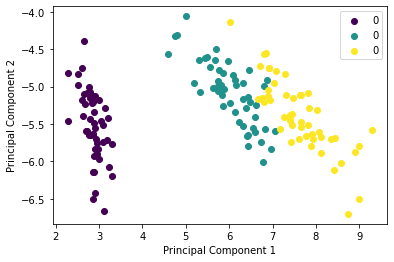

In [1]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np
%matplotlib inline

def shuffle_data(X, y, seed=None):
   if seed:
     np.random.seed(seed)

   idx = np.arange(X.shape[0])
   np.random.shuffle(idx)

   return X[idx], y[idx]

# 正规化数据集 X
def normalize(X, axis=-1, p=2):
   lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
   lp_norm[lp_norm == 0] = 1
   return X / np.expand_dims(lp_norm, axis)
# 标准化数据集 X
def standardize(X):
   X_std = np.zeros(X.shape)
   mean = X.mean(axis=0)
   std = X.std(axis=0)

   # 做除法运算时请永远记住分母不能等于 0 的情形
   # X_std = (X - X.mean(axis=0)) / X.std(axis=0)
   for col in range(np.shape(X)[1]):
     if std[col]:
       X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
   return X_std
# 划分数据集为训练集和测试集
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
   if shuffle:
     X, y = shuffle_data(X, y, seed)
   n_train_samples = int(X.shape[0] * (1-test_size))
   x_train, x_test = X[:n_train_samples], X[n_train_samples:]
   y_train, y_test = y[:n_train_samples], y[n_train_samples:]

   return x_train, x_test, y_train, y_test

# 计算矩阵 X 的协方差矩阵
def calculate_covariance_matrix(X, Y=np.empty((0,0))):
   if not Y.any():
      Y = X
   n_samples = np.shape(X)[0]
   covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))
   return np.array(covariance_matrix, dtype=float)
# 计算数据集 X 每列的方差
def calculate_variance(X):
   n_samples = np.shape(X)[0]
   variance = (1 / n_samples) * np.diag((X - X.mean(axis=0)).T.dot(X - X.mean(axis=0)))
   return variance
# 计算数据集 X 每列的标准差
def calculate_std_dev(X):
   std_dev = np.sqrt(calculate_variance(X))
   return std_dev


# 计算相关系数矩阵
def calculate_correlation_matrix(X, Y=np.empty([0])):
   # 先计算协方差矩阵
   covariance_matrix = calculate_covariance_matrix(X, Y)
   # 计算 X, Y 的标准差
   std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
   std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
   correlation_matrix = np.divide(covariance_matrix, std_dev_X.dot(std_dev_y.T))

   return np.array(correlation_matrix, dtype=float)

class PCA():
   """
   主成份分析算法 PCA，非监督学习算法.
   """
   def __init__(self):
     self.eigen_values = None
     self.eigen_vectors = None
     self.k = 2

   def transform(self, X):
     """
     将原始数据集 X 通过 PCA 进行降维
     """
     covariance = calculate_covariance_matrix(X)

     # 求解特征值和特征向量
     self.eigen_values, self.eigen_vectors = np.linalg.eig(covariance)

     # 将特征值从大到小进行排序，注意特征向量是按列排的，即 self.eigen_vectors 第 k 列是 self.eigen_values 中第 k 个特征值对应的特征向量
     idx = self.eigen_values.argsort()[::-1]
     eigenvalues = self.eigen_values[idx][:self.k]
     eigenvectors = self.eigen_vectors[:, idx][:, :self.k]
     # 将原始数据集 X 映射到低维空间
     X_transformed = X.dot(eigenvectors)

     return X_transformed

def main():
   # Load the dataset
   data = datasets.load_iris()
   X = data.data
   y = data.target

   # 将数据集 X 映射到低维空间
   X_trans = PCA().transform(X)

   x1 = X_trans[:, 0]
   x2 = X_trans[:, 1]

   cmap = plt.get_cmap('viridis')
   colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

   class_distr = []
   # Plot the different class distributions
   for i, l in enumerate(np.unique(y)):
       _x1 = x1[y == l]
       _x2 = x2[y == l]
       _y = y[y == l]
       class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

   # Add a legend
   plt.legend(class_distr, y, loc=1)

   # Axis labels
   plt.xlabel('Principal Component 1')
   plt.ylabel('Principal Component 2')
   plt.show()

if __name__ == "__main__":
   main()

## Pincipal Component Analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [4]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
             header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


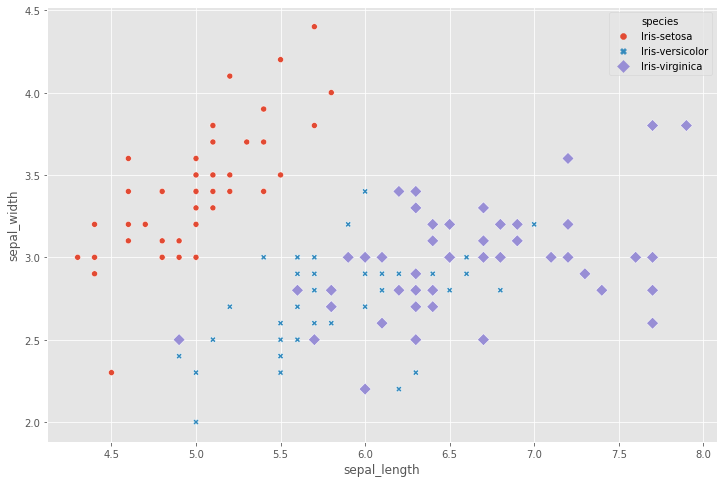

In [7]:
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width,
               hue=iris.species, style=iris.species )

In [10]:
## Standardize the data

X=iris.iloc[:,0:4].values
y=iris.species.values


from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $\u03a3 = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [11]:
covariance_matrix= np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $\u03a3 = W\wedge W^{-1}$

In [12]:
eigen_values, eigen_vectors=np.linalg.eig(covariance_matrix)

## Task 6: Singular Value Decomposition (SVD)

In [14]:
eigen_vec_svd, s,v =np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [15]:
for val in eigen_values:
    print(val)

2.930353775589315
0.9274036215173407
0.1483422264816398
0.02074601399559622


In [16]:
variance_explained=[(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380134, 23.030523267680632, 3.683831957627389, 0.5151926808906395]

In [18]:
cumulative_variance_explained=np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

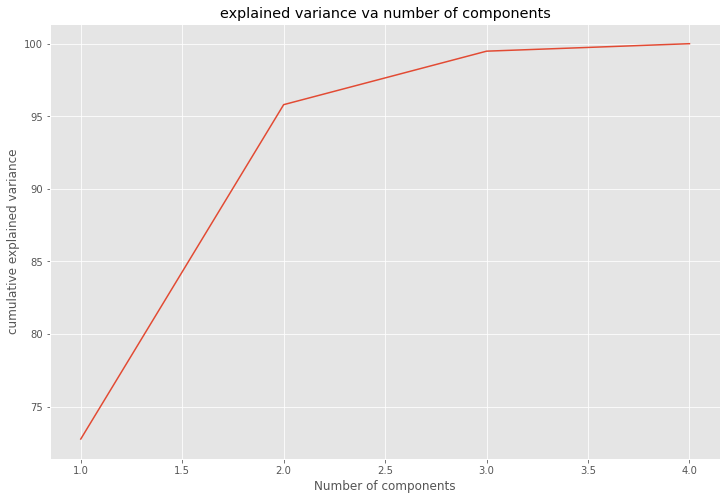

In [19]:
sns.lineplot(x=[1,2,3,4], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("cumulative explained variance")
plt.title("explained variance va number of components")
plt.show()

In [22]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [23]:
projection_matrix=(eigen_vectors.T[:][:])[:2].T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [24]:
X_pca=X.dot(projection_matrix)

d:\program\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\program\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\program\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


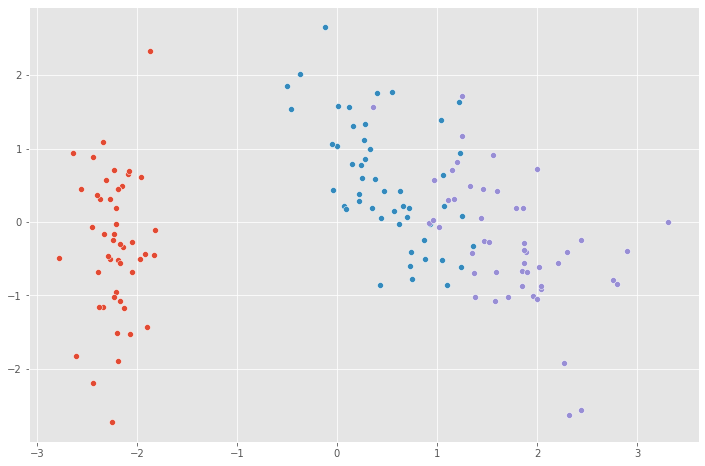

In [25]:
for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
    sns.scatterplot(X_pca[y==species, 0],
                   X_pca[y==species, 1])
    